In [1]:
import numpy as np

# generate time series
def generate_time_series(batch_size: int, n_steps: int) -> np.ndarray:
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [2]:
data = generate_time_series(32, 15)

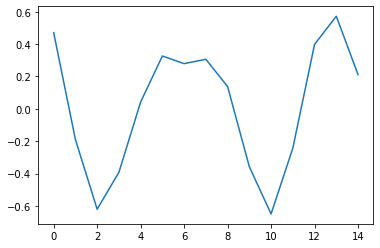

In [3]:
import matplotlib.pyplot as plt

plt.plot(data[0])

In [4]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

# Seq-2-Vec

##simple Feedforward Net

In [5]:
INPUT_SHAPE = X_train.shape[1:]

In [6]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Sequential

ffn = Sequential([
    Flatten(input_shape=INPUT_SHAPE),
    Dense(1)
])

ffn.compile(optimizer="Adam", loss="mean_squared_error")

In [7]:
ffn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [8]:
ffn.fit(
    X_train, 
    y_train, 
    epochs=20,
    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 4s 3ms/step - loss: 0.0868 - val_loss: 0.0362
Epoch 2/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0280 - val_loss: 0.0211
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0179 - val_loss: 0.0152
Epoch 4/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0136 - val_loss: 0.0125
Epoch 5/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0113 - val_loss: 0.0109
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0098 - val_loss: 0.0091
Epoch 7/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0085 - val_loss: 0.0081
Epoch 8/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0075 - val_loss: 0.0073
Epoch 9/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 10/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0060 - val_loss: 0.0057

In [9]:
ffn.evaluate(X_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.0039


0.0038963069673627615

## RNN

In [10]:
# simple RNN
from tensorflow.keras.layers import SimpleRNN

simple_rnn = Sequential([SimpleRNN(1, input_shape=[None, 1])])
simple_rnn.compile(optimizer='Adam', loss="mean_squared_error")

In [11]:
simple_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [12]:
simple_rnn.fit(
    X_train, 
    y_train, 
    epochs=20,
    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 8s 34ms/step - loss: 0.1875 - val_loss: 0.1721
Epoch 2/20
219/219 [==============================] - 7s 33ms/step - loss: 0.1558 - val_loss: 0.1436
Epoch 3/20
219/219 [==============================] - 7s 34ms/step - loss: 0.1301 - val_loss: 0.1180
Epoch 4/20
219/219 [==============================] - 8s 34ms/step - loss: 0.1055 - val_loss: 0.0941
Epoch 5/20
219/219 [==============================] - 8s 35ms/step - loss: 0.0834 - val_loss: 0.0733
Epoch 6/20
219/219 [==============================] - 8s 35ms/step - loss: 0.0642 - val_loss: 0.0553
Epoch 7/20
219/219 [==============================] - 7s 33ms/step - loss: 0.0479 - val_loss: 0.0402
Epoch 8/20
219/219 [==============================] - 7s 33ms/step - loss: 0.0346 - val_loss: 0.0285
Epoch 9/20
219/219 [==============================] - 7s 33ms/step - loss: 0.0248 - val_loss: 0.0204
Epoch 10/20
219/219 [==============================] - 7s 33ms/step - loss: 0.0185 - val_lo

In [13]:
simple_rnn.evaluate(X_test, y_test)

32/32 [==============================] - 0s 5ms/step - loss: 0.0111


0.011112567037343979

## Deep RNN

In [14]:
# "deep"-RNN
rnn = Sequential([
    SimpleRNN(units=20, return_sequences=True, input_shape=[None, 1]),
    SimpleRNN(units=20, return_sequences=True),
    SimpleRNN(units=1)
])

rnn.compile(optimizer="Adam", loss="mean_squared_error")

In [15]:
rnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1)                 22        
                                                                 
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [16]:
rnn.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
219/219 [==============================] - 29s 124ms/step - loss: 0.0296 - val_loss: 0.0069
Epoch 2/20
219/219 [==============================] - 26s 118ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 3/20
219/219 [==============================] - 26s 117ms/step - loss: 0.0049 - val_loss: 0.0042
Epoch 4/20
219/219 [==============================] - 26s 119ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 5/20
219/219 [==============================] - 26s 118ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 6/20
219/219 [==============================] - 26s 118ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 7/20
219/219 [==============================] - 25s 116ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 8/20
219/219 [==============================] - 27s 121ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 9/20
219/219 [==============================] - 26s 118ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 10/20
219/219 [==============================] - 26s 119ms/step - l

In [17]:
rnn.evaluate(X_test, y_test)

32/32 [==============================] - 0s 13ms/step - loss: 0.0028


0.0028358525596559048

To be continued (Aurelien Geron - Page 511)